In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df= pd.read_csv (r'heart.csv')
X = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall']].to_numpy()
y = df['output'].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size = 0.2, random_state =42)

**bullet 1：**

In [4]:
from sklearn.linear_model import Perceptron
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(train_X, train_Y)

Perceptron(random_state=42)

In [5]:
from sklearn.model_selection import cross_val_score
cross_val_score(per_clf,train_X,train_Y,cv=10, scoring="accuracy")

array([0.72      , 0.56      , 0.54166667, 0.75      , 0.54166667,
       0.41666667, 0.45833333, 0.45833333, 0.58333333, 0.66666667])

In [6]:
print("test set score:", per_clf.score(test_X, test_Y))

test set score: 0.5409836065573771


conclusion ：In my test set, the linear classifier does not work well.

hypothesis: this dataset is not linearly separaple.  
Linearly related data sets may be more feasible for linear classifiers.

**bullet 2:**

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [10]:
import tensorflow as tf
from tensorflow import keras

Activation functions

In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

epochs=50

In [12]:
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/50
6/6 [==============================] - 0s 18ms/step - loss: 0.8246 - val_loss: 0.9108
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.7785 - val_loss: 0.8682
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 0.7419 - val_loss: 0.8304
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 0.7092 - val_loss: 0.7896
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 0.6733 - val_loss: 0.7591
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 0.6474 - val_loss: 0.7284
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 0.6204 - val_loss: 0.7006
Epoch 8/50
6/6 [==============================] - 0s 2ms/step - loss: 0.5968 - val_loss: 0.6740
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 0.5735 - val_loss: 0.6499
Epoch 10/50
6/6 [==============================] - 0s 2ms/step - loss: 0.5528 - val_loss: 0.6260
Epoch 11/50
6/6 [=====================

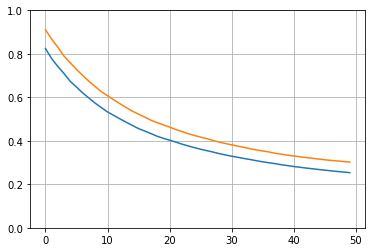

In [13]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [14]:
y_pred

array([[0.73590684],
       [0.81380147],
       [0.5244442 ]], dtype=float32)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                420       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________


epochs=100;3 layer; regularizer L2

In [16]:
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),   
    keras.layers.Dense(3,activation="relu", kernel_regularizer = tf.keras.regularizers.l2()),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/100
6/6 [==============================] - 0s 16ms/step - loss: 2.3904 - val_loss: 1.9948
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 1.9814 - val_loss: 1.6706
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 1.6885 - val_loss: 1.3977
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 1.4403 - val_loss: 1.2045
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 1.2630 - val_loss: 1.0499
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 1.1204 - val_loss: 0.9341
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 1.0123 - val_loss: 0.8448
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 0.9272 - val_loss: 0.7620
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 0.8475 - val_loss: 0.7032
Epoch 10/100
6/6 [==============================] - 0s 3ms/step - loss: 0.7915 - val_loss: 0.6562
Epoch 11/100
6/6 [==========

6/6 [==============================] - 0s 2ms/step - loss: 0.2969 - val_loss: 0.2517
Epoch 85/100
6/6 [==============================] - 0s 2ms/step - loss: 0.2958 - val_loss: 0.2510
Epoch 86/100
6/6 [==============================] - 0s 3ms/step - loss: 0.2946 - val_loss: 0.2503
Epoch 87/100
6/6 [==============================] - 0s 2ms/step - loss: 0.2935 - val_loss: 0.2496
Epoch 88/100
6/6 [==============================] - 0s 3ms/step - loss: 0.2924 - val_loss: 0.2490
Epoch 89/100
6/6 [==============================] - 0s 3ms/step - loss: 0.2913 - val_loss: 0.2483
Epoch 90/100
6/6 [==============================] - 0s 3ms/step - loss: 0.2903 - val_loss: 0.2477
Epoch 91/100
6/6 [==============================] - 0s 3ms/step - loss: 0.2892 - val_loss: 0.2471
Epoch 92/100
6/6 [==============================] - 0s 3ms/step - loss: 0.2882 - val_loss: 0.2464
Epoch 93/100
6/6 [==============================] - 0s 3ms/step - loss: 0.2870 - val_loss: 0.2457
Epoch 94/100
6/6 [===============

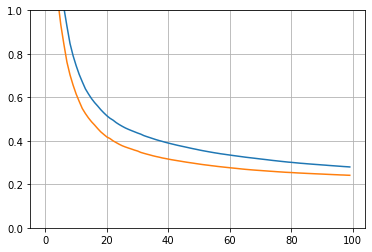

In [17]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [18]:
y_pred

array([[0.7059063],
       [1.0125808],
       [1.0245696]], dtype=float32)

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 30)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 93        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 4         
Total params: 517
Trainable params: 517
Non-trainable params: 0
_________________________________________________________________


conclusion:In my data set, 3 layers have better accuracy than two layers, but it is undeniable that the learning time required becomes longer, I think it is worth it.

**bullet 3：**

conclusion ：Linear Classifiers are models that assume a linear relationship between features and classification results. This model assists category decision-making by accumulating the product of each dimension's feature and its respective weight.

MLP has good results when used on the new data set.

The role of the activation function is The activation function is used to add non-linear factors, because the expressive ability of the linear model is not enough.

**bullet 4：**

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [21]:
print(X_train)
print('\n')
print(X_train.shape)

[[-1.20888788  0.71962292 -0.95452756 ...  1.02153805  0.31719113
  -0.51430904]
 [-0.09861808  0.71962292  1.00052889 ...  1.02153805 -0.71977986
   1.10481201]
 [ 0.67857078 -1.38961667 -0.95452756 ...  1.02153805 -0.71977986
  -0.51430904]
 ...
 [ 1.1226787  -1.38961667  1.00052889 ...  1.02153805  0.31719113
  -0.51430904]
 [ 1.45575964 -1.38961667  1.00052889 ... -0.6323807  -0.71977986
  -0.51430904]
 [ 0.34548984 -1.38961667 -0.95452756 ... -0.6323807  -0.71977986
  -0.51430904]]


(170, 13)


In [35]:
from tensorflow import keras

model = keras.Sequential(
    [
        keras.layers.Dense(
            256, activation="relu", input_shape=[13]
        ),
        keras.layers.Dense(500, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(50, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="relu"),
    ]
)
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               3584      
_________________________________________________________________
dense_16 (Dense)             (None, 500)               128500    
_________________________________________________________________
dropout_4 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 50)                25050     
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 51        
Total params: 157,185
Trainable params: 157,185
Non-trainable params: 0
________________________________________________

In [41]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid),batch_size=15,epochs=50,verbose=1)

Epoch 1/50
12/12 [==============================] - 0s 5ms/step - loss: 0.2319 - binary_accuracy: 0.9706 - val_loss: 1.3291 - val_binary_accuracy: 0.8421
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 0.2227 - binary_accuracy: 0.9824 - val_loss: 1.5731 - val_binary_accuracy: 0.8421
Epoch 3/50
12/12 [==============================] - 0s 3ms/step - loss: 0.2182 - binary_accuracy: 0.9824 - val_loss: 1.6060 - val_binary_accuracy: 0.8421
Epoch 4/50
12/12 [==============================] - 0s 3ms/step - loss: 0.3063 - binary_accuracy: 0.9706 - val_loss: 1.5817 - val_binary_accuracy: 0.8070
Epoch 5/50
12/12 [==============================] - 0s 3ms/step - loss: 0.2163 - binary_accuracy: 0.9765 - val_loss: 1.5139 - val_binary_accuracy: 0.8246
Epoch 6/50
12/12 [==============================] - 0s 3ms/step - loss: 0.2191 - binary_accuracy: 0.9765 - val_loss: 1.7552 - val_binary_accuracy: 0.8246
Epoch 7/50
12/12 [==============================] - 0s 3ms/step - loss: 0.30

In [42]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 988us/step - loss: 2.2620 - binary_accuracy: 0.8289


[2.2620038986206055, 0.8289473652839661]